In [49]:
import pandas as pd

In [50]:
df=pd.read_csv("outbreak_detect.csv")
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No


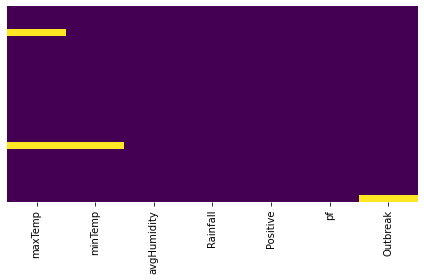

In [51]:
#visualizing-nan values
import seaborn as sns
import matplotlib.pyplot as plt
def get_heatmap(df):
    #this function gives heatmap of all nan values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False , cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [52]:
#data processing -dropping rows with nan values
df = df.dropna()
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
4,34.0,24.0,59.16,9.06,4198,211,No
5,34.0,27.0,73.23,0.00,11808,712,Yes


In [53]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
df.Outbreak=LE.fit_transform(df.Outbreak)
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,0
1,34.0,23.0,83.27,15.22,10717,677,1
2,40.0,23.0,50.74,0.00,1257,127,0
4,34.0,24.0,59.16,9.06,4198,211,0
5,34.0,27.0,73.23,0.00,11808,712,1


In [54]:
df = df.drop('Positive',axis=1)
df = df.drop('pf',axis=1)

In [55]:
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
0,29.0,18.0,49.74,0.00,0
1,34.0,23.0,83.27,15.22,1
2,40.0,23.0,50.74,0.00,0
4,34.0,24.0,59.16,9.06,0
5,34.0,27.0,73.23,0.00,1


In [56]:
#importing standardscaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()

#standardizing the data apart from the class column
data_scaled=df.iloc[:,:-1].values

data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)

#data_scaled = pd.DataFrame(sst.fit_transform(df.drop('Outbreak',axis=1)))
#Adding the class column back to the DataFrame

In [57]:
data_scaled.head()

,0,1,2,3
0,-1.329034,-2.078144,-1.197198,-0.684437
1,-0.196894,-0.333717,1.042817,0.918413
2,1.161674,-0.333717,-1.130392,-0.684437
3,-0.196894,0.015169,-0.567883,0.269690
4,-0.196894,1.061826,0.372082,-0.684437


In [58]:
data_scaled.columns=['maxTemp','mixTemp','avgHumidity','Rainfall']

In [59]:
data_scaled.head()

,maxTemp,mixTemp,avgHumidity,Rainfall
0,-1.329034,-2.078144,-1.197198,-0.684437
1,-0.196894,-0.333717,1.042817,0.918413
2,1.161674,-0.333717,-1.130392,-0.684437
3,-0.196894,0.015169,-0.567883,0.269690
4,-0.196894,1.061826,0.372082,-0.684437


In [60]:
data_scaled['class'] = df.Outbreak

In [61]:
data_scaled

,maxTemp,mixTemp,avgHumidity,Rainfall,class
0,-1.329034,-2.078144,-1.197198,-0.684437,0.0
1,-0.196894,-0.333717,1.042817,0.918413,1.0
2,1.161674,-0.333717,-1.130392,-0.684437,0.0
3,-0.196894,0.015169,-0.567883,0.269690,NaN
4,-0.196894,1.061826,0.372082,-0.684437,0.0
5,-0.876178,0.015169,1.410252,3.675483,1.0
6,-0.423322,0.015169,0.686740,1.830415,1.0
7,-0.876178,0.015169,1.129666,0.489793,1.0
8,0.255962,0.015169,-0.952687,-0.461175,0.0
9,-0.649750,-0.333717,-0.678781,-0.684437,0.0


In [62]:
data_scaled = data_scaled[data_scaled['class'].notna()]

In [63]:
#loading the data
x = data_scaled.iloc[:,0:4]
y = data_scaled.iloc[:,4:5]

In [64]:
#splitting the dataset
#splitting the dataset into Train and Test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=3)

In [65]:
X_train

,maxTemp,mixTemp,avgHumidity,Rainfall
2,1.161674,-0.333717,-1.130392,-0.684437
20,-1.102606,-0.333717,1.279312,0.074863
16,1.161674,1.061826,-0.246544,-0.684437
13,1.840958,1.410711,0.094168,-0.194736
5,-0.876178,0.015169,1.410252,3.675483
19,-0.876178,-0.333717,0.380099,-0.161036
7,-0.876178,0.015169,1.129666,0.489793
8,0.255962,0.015169,-0.952687,-0.461175
6,-0.423322,0.015169,0.686740,1.830415
17,0.935246,0.364054,-1.345508,-0.684437


In [66]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [67]:
y_pred=clf.predict(X_test)

In [68]:
y_pred

array([0., 0., 1.])

In [69]:
y_test

,class
21,1.0
14,0.0
1,1.0


In [70]:
df

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
0,29.0,18.0,49.74,0.00,0
1,34.0,23.0,83.27,15.22,1
2,40.0,23.0,50.74,0.00,0
4,34.0,24.0,59.16,9.06,0
5,34.0,27.0,73.23,0.00,1
6,31.0,24.0,88.77,41.40,1
7,33.0,24.0,77.94,23.88,1
8,31.0,24.0,84.57,11.15,0
9,36.0,24.0,53.40,2.12,0
10,32.0,23.0,57.50,0.00,1


In [71]:
y_train_pred=clf.predict(X_train)

In [72]:
y_train_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0.])

In [73]:
import numpy as np
y_actual=np.array(y_train)
y_actual.flatten()

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0.])

In [74]:
#Evaluating the Model
#Train set results
data = {'y_pred': y_train_pred, 'y_actual': y_actual.flatten()}

data=pd.DataFrame(data)
data

,y_pred,y_actual
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,0.0,0.0
8,1.0,1.0
9,0.0,1.0


In [75]:
df1=data_scaled

In [76]:
df1

,maxTemp,mixTemp,avgHumidity,Rainfall,class
0,-1.329034,-2.078144,-1.197198,-0.684437,0.0
1,-0.196894,-0.333717,1.042817,0.918413,1.0
2,1.161674,-0.333717,-1.130392,-0.684437,0.0
4,-0.196894,1.061826,0.372082,-0.684437,0.0
5,-0.876178,0.015169,1.410252,3.675483,1.0
6,-0.423322,0.015169,0.686740,1.830415,1.0
7,-0.876178,0.015169,1.129666,0.489793,1.0
8,0.255962,0.015169,-0.952687,-0.461175,0.0
9,-0.649750,-0.333717,-0.678781,-0.684437,0.0
10,-0.196894,-2.078144,-0.551849,-0.684437,1.0
